# Notes

The mathematical principle of regression is called $\textbf{ordinary least squares}$. Suppose we have to solve the model
$$X\theta = y,$$
where $X$ is the data matrix and $y$ is the target value of our prediction. We find the parameters $\theta$ in the regression model by minimizing the error function
$$E(\theta) = ||X\theta-y||,$$
which is a vector norm.

In general, any types of regression model are based on the concept of ordinary least squares. For example,

(i) $y = ax + b$ (linear model)

(ii) $y = a_0 + a_1 x + \dots + a_n x^n$ (polynomial model)

(iii) $y = \theta_0 + \theta_1x_1 +...+\theta_nx_n$ (multiple linear regression)

(iv) $y = k x^m$ (power model)

(v) $y = a + k(b^x)$ (exponential model)

(vi) $y = m\log x + c$ (logarithmic model)

## ```Example (Implementation by Hand)```

Suppose we are going to model the estimated profit $y$ (in US dollars) for a concert when the charge is $x$ dollars per ticket.  The data points are as follows.
$$(2, 2600), (5, 6500), (8, 8600), (11, 8900), (14, 7400), (17, 4100)$$

We want to fit the model $y = \theta_0 + \theta_1x + \theta_2x^2$.

### _Step 1: Define the data matrix $X$ and target vector $y$._

In [ ]:
import numpy as np

In [ ]:
data = np.array([[2],[5],[8],[11],[14],[17]])
X = np.hstack((np.ones(data.shape),data,data**2))      # np.hstack() combine the three columns horizontally into X
X

array([[  1.,   2.,   4.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,  11., 121.],
       [  1.,  14., 196.],
       [  1.,  17., 289.]])

In [ ]:
y = np.array([[2600], [6500], [8600], [8900], [7400], [4100]])
y

array([[2600],
       [6500],
       [8600],
       [8900],
       [7400],
       [4100]])

### _Step 2: The optimal solution to minimize the error function $E(\theta)$ is_
$$\theta^* = (X^TX)^{-1}X^Ty.$$

In [ ]:
from numpy.linalg import inv

In [ ]:
theta = inv(X.T@X)@X.T@y
theta

array([[-1000.],
       [ 2000.],
       [ -100.]])

Hence, the model is $y = -1000+2000x-100x^2$.

## ```Example (Implementation by Sklearn Package)```

We fit the same model above using the scikit-learn packages again.

### _Step 1: Define the data matrix $X$ and target vector $y$._

In [ ]:
data = np.array([[2],[5],[8],[11],[14],[17]])
X = np.hstack((np.ones(data.shape),data))
X

array([[ 1.,  2.],
       [ 1.,  5.],
       [ 1.,  8.],
       [ 1., 11.],
       [ 1., 14.],
       [ 1., 17.]])

### _Step 2: Separate $X$ and $y$ into training set and testing set._

In practice, it is suggested to separate the data set and target into training set and testing set in order to test the accuracy of the model. The code below will set 75% of the data to training set and 25% to testing set by default.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### _Step 3: Standardize features by removing the mean and scaling to unit variance._

In practice, it is suggested to subtract the mean and divide by the standard deviation on each feature in the data matrix $X$. This will $\textbf{increase the speed}$ and $\textbf{minize the error}$ in computing the model parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    # Mean and s.d. of each feature are calculated.
X_test_scaled = scaler.transform(X_test)          # Without the "fit_" in the code, mean and s.d. of X_train are still be
                                                  # used, since we want the test data set is not correlated to the fitting
                                                  # of the model.

### _Step 4: Model Fitting._

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly.fit(X_train_poly, y_train)

PolynomialFeatures()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)       # This is the degree 2 polynomial model we want.

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)
y_pred                                 # The model predicts the test data accurately.

array([[8600.],
       [7400.]])

### _Step 5: Model Evaluation. (Check whether the model is good enough compared to other candidate model.)_

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)         # Compute the mean squared error of the model on the test data set.
mse

2.0679515313825692e-24

In [ ]:
rss = ((y_test-y_pred)**2).sum()                 # Compute the residual sum of sq
rss

4.1359030627651384e-24

# Exercise

1. Consider the following two data sets. Which one should be represented by a linear model? Which one should be represented by a quadratic model? Why?

(i) $(0.8, -0,752), (1, -0,8), (1.1, -0.818), (1.3, -0.842), (1.6, -0.848), (1.8, -0.832), (2, -0.8), (2.1, -0.778), (2.5, -0.65), (2.9, -0.458)$

(ii) $(0.8, 3.08), (1, 3), (1.1, 2.96), (1.3, 2.88), (1.6, 2.76), (1.8, 2.68), (2, 2.6), (2.1, 2.56), (2.5, 2.4), (2.9, 2.24)$

In [ ]:
# (a)
X1 = np.array([[0.8], [1], [1.1], [1.3], [1.6], [1.8], [2], [2.1], [2.5], [2.9]])
X1 = np.hstack((np.ones(X1.shape), X1, X1**2))
y1 = np.array([[-0.752], [-0.8], [-0.818], [-0.842], [-0.848], [-0.832], [-0.8], [-0.778], [-0.65], [-0.458]])
th1_lin = inv(X1[:, :2].T@X1[:, :2])@X1[:, :2].T@y1
th1_qua = inv(X1.T@X1)@X1.T@y1
rss1_lin = ((y1 - X1[:, :2]@th1_lin)**2).sum()
rss1_qua = ((y1 - X1@th1_qua)**2).sum()

print('RSS for linear model =', rss1_lin)
print('RSS for quadratic model =', rss1_qua)
print('')
print('Quadratic model should be selected as its RSS is smaller.')

RSS for linear model = 0.06475521995682415
RSS for quadratic model = 8.363774488089337e-28

Quadratic model should be selected as its RSS is smaller.


In [ ]:
# (b)
y2 = np.array([[3.08], [3], [2.96], [2.88], [2.76], [2.68], [2.6], [2.56], [2.4], [2.24]])
th2_lin = inv(X1[:, :2].T@X1[:, :2])@X1[:, :2].T@y2
th2_qua = inv(X1.T@X1)@X1.T@y2
rss2_lin = ((y2 - X1[:, :2]@th2_lin)**2).sum()
rss2_qua = ((y2 - X1@th2_qua)**2).sum()

print('RSS for linear model =', rss2_lin)
print('RSS for quadratic model =', rss2_qua)
print('')
print('Linear model should be selected as its RSS is smaller.')

RSS for linear model = 1.9721522630525295e-31
RSS for quadratic model = 9.985006907834957e-27

Linear model should be selected as its RSS is smaller.


2. Consider the following ten data points.$\\$
$$(-3, 46), (-2, 13), (-1, 0), (0, 1), (6, -35), (7, -104), (10, -539), (11, -780)\\$$
Build a model to fit these data points using a $\textbf{polynomial}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = np.array([[-3], [-2], [-1], [0], [6], [7], [10], [11]])
y = np.array([[46], [13], [0], [1], [-35], [-104], [-539], [-780]])

In [ ]:
# training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# "random_state" will fix the separation of training set and testing set.
# That means even you execute this cell 10 times, the training set and testing set are still the same distribution.

In [ ]:
# standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
degrees = range(1, 10)
mse_values = []

In [ ]:
# This for loop runs the sklearn packages to fit the polynomial model from degree 1 to 9.

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    print('Degree', degree)
    print(model.coef_, model.intercept_)
    print('')

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

Degree 1
[[  0.         -52.04753029]] [-18.31780056]

Degree 2
[[ 0.         15.24637343 -8.04706995]] [81.81684811]

Degree 3
[[ 0.  6.  4. -1.]] [1.]

Degree 4
[[ 0.00000000e+00  6.00000000e+00  4.00000000e+00 -1.00000000e+00
  -2.33866286e-15]] [1.]

Degree 5
[[ 0.00000000e+00  6.00000000e+00  4.00000000e+00 -1.00000000e+00
   4.22685151e-13 -1.53165993e-14]] [1.]

Degree 6
[[-1.60054704e-11  9.13619481e-01 -9.63074325e-01 -4.78517553e-01
   3.36523156e-01 -5.90842182e-02  2.56887905e-03]] [1.]

Degree 7
[[-1.61752938e-10  4.97141790e-01 -4.40296335e-01  4.70816107e-01
   2.68815706e-01 -1.25396768e-01  1.35724854e-02 -4.69272349e-04]] [1.]

Degree 8
[[-1.25845043e-09  3.02189222e-01 -2.99359602e-01  2.70068134e-01
  -2.82924279e-01 -9.38111980e-02  5.35011434e-02 -6.95421426e-03
   2.74682077e-04]] [1.]

Degree 9
[[ 1.77217910e-08  2.23064513e-01 -2.21562041e-01  2.19602147e-01
  -2.00303215e-01  2.07317966e-01  3.86698421e-02 -2.91870709e-02
   3.84245511e-03 -1.50513086e-04]] [0

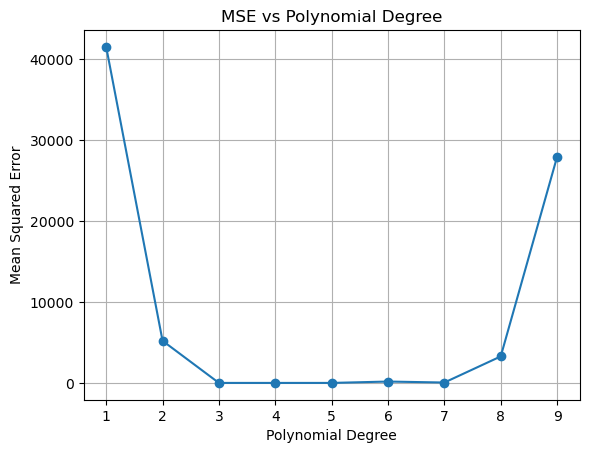

In [ ]:
# Plot the mse values of each degree polynomial model.
# We would like to find the model with least value of mse.
# In general, we would like a lower degree model for simplicity. (avoid overfitting)

import matplotlib.pyplot as plt
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.xticks(degrees)
plt.grid()
plt.show()


# You may find that from the following graph, degree 3 polynomial model should be the best.
# And from the previous cell, we obtain the model is -x^3 + 4x^2 + 6x + 1.

3. Consider the following eight data points.$\\$
$$(-4, 385), (-2.5, 47.875), (-1.5, 4.375), (-1, 1), (1, 5), (2, 49), (5, 1501), (6, 3025)\\$$
Build a model to fit these data points using a $\textbf{polynomial}$.

In [ ]:
X = np.array([[-4], [-2.5], [-1.5], [-1], [1], [2], [5], [6]])
y = np.array([[385], [47.875], [4.375], [1], [5], [49], [1501], [3025]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
degrees = range(1, 10)
mse_values = []

In [ ]:
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    print('Degree', degree)
    print(model.coef_, model.intercept_)
    print('')

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

Degree 1
[[  0.         257.20516676]] [584.45776381]

Degree 2
[[ 0.         96.09194129 61.65416662]] [-102.75528589]

Degree 3
[[   0.         -101.36014448   42.3671116     9.77035189]] [-106.14742646]

Degree 4
[[ 0.00000000e+00 -6.54877962e-14 -1.17081478e-14  2.00000000e+00
   2.00000000e+00]] [1.]

Degree 5
[[ 0.00000000e+00 -4.85953813e-14 -2.20360620e-14  2.00000000e+00
   2.00000000e+00  3.53915660e-16]] [1.]

Degree 6
[[ 8.01442246e-14  2.47409962e-01 -5.11064012e-01  1.73884504e+00
   2.06372681e+00  1.37449979e-02 -2.49909052e-03]] [1.44983629]

Degree 7
[[-1.77342863e-12  1.22184578e+00  4.49468472e-01  6.18701300e-01
   1.36196098e+00  1.65768267e-01  3.38750128e-02 -6.31535135e-03]] [1.15469553]

Degree 8
[[-2.20844623e-11  1.34032649e+00  2.95578610e-01  8.77953376e-01
   8.19699090e-01 -2.33553098e-01  1.18153940e-01  1.52732316e-02
  -3.70288787e-03]] [1.77027125]

Degree 9
[[ 8.30232315e-11  8.84724753e-01  9.06310443e-02  7.49126458e-01
   2.89729904e-01  4.536037

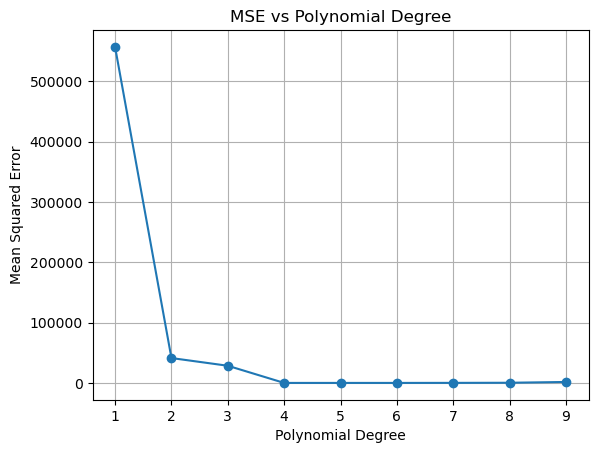

In [ ]:
import matplotlib.pyplot as plt
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.xticks(degrees)
plt.grid()
plt.show()

# From the graph below, we should select degree 4 polynomial, and the model is 2x^4 + 2x^3 + 1.

4. We are going to build a model using a famous data set, "Iris Flower Data Set". The following description is copied from Wikipedia.

* The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper.

* The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish each species.

* In the data set, "data" is the input of the model, "target" is the species predicted. In the column "target", "0" stands for "setosa", "1" stands for versicolor, "2" stands for "virginica".

<img src='https://drive.google.com/uc?id=1jPmMDqG5PYjnVGDlmAerhdz6aJbli6ur'>

Now, we would like to build a multiple linear regression model to predict the the species of iris flower.

(a) Execute the following codes to import the data set. "keys()" is a command to read the filter in the data set.

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(b) Define the data matrix $X$ and target vector $y$.

In [ ]:
X = iris_data.data
y = iris_data.target

(c) Solve the model $X\theta = y$ by using the theoretical optimal solution.

In [ ]:
th = inv(X.T@X)@X.T@y
print(th)

[-0.0844926  -0.02356211  0.22487123  0.59972247]


5. Redo the work in Q4. But this time please use the scikit-learn packages to complete the task.

(a) Separate the data set into training set and testing set.

In [ ]:
X = iris_data.data
y = iris_data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

(b) Standardize the features. (i.e. Removing the mean and divide by the standard deviation.)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(c) Model fitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.11548607, -0.05327186,  0.26631062,  0.52537257])

In [ ]:
model.intercept_

0.21023176385323006

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[ 1.23871249 -0.04013211  2.22838234  1.34928356  1.28957782  0.01509759
  1.05072392  1.81477615  1.36347665  1.06563701  1.69803163 -0.07854485
 -0.16011484 -0.06878958 -0.02410259  1.39912838  2.00017795  1.04685134
  1.28418206  1.9691188   0.02814876  1.59654379  0.08792308  1.91658154
  1.85059181  1.86983162  1.79356763  2.03404607  0.02652966  0.02192734
 -0.14139774 -0.07282009  1.17862062  0.00594578 -0.0170986   1.67925082
  1.28710758 -0.07220689]


(d) Model Evaluation.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.03611030626905015
R^2 Score: 0.9487283360348984


In [ ]:
# Note that 0 <= R^2 <= 1. The model is good if its R^2 score close to one.